# STUDENT PERFORMANCE INDICATOR

### Life cycle of ML Project
1. Understanding Problem statement
2. Data Collection
3. Data understanding and basic data cleaning
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model Training
7. Model Selection

## 1. Problem Statement

The aim of this project is to understand how the student's performance is affected by other variables such as gender, ethnicity, parental level of education, lunch and test preparation course

## 2. Data Collection

* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

In [2]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import csv as a pandas dataframe
data = pd.read_csv('data/stud.csv')

In [4]:
# show top 5 records
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# shape of the dataset
data.shape

(1000, 8)

#### Dataset Information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

## 3. Data Understanding and Basic Data Cleaning

In [6]:
# Check duplicates
data.duplicated().sum()

0

In [7]:
# dataset information and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:

# Select categorical columns
obj_cols = [feature for feature in data.columns if data[feature].dtype  == 'object']
print("There are ",len(obj_cols)," categorical columns:\n", obj_cols, '\n')

# Select numerical columns
num_cols = [feature for feature in data.columns if data[feature].dtype in ['int64','float64']]
print("There are ",len(num_cols)," Numerical data columns:\n", num_cols)

There are  5  categorical columns:
 ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 

There are  3  Numerical data columns:
 ['math_score', 'reading_score', 'writing_score']


In [9]:
# Checking unique values
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
# Check various categories present in the categorical column
for i in obj_cols:
    print(f"{i}  :\n  {data[i].unique()} \n")

gender  :
  ['female' 'male'] 

race_ethnicity  :
  ['group B' 'group C' 'group A' 'group D' 'group E'] 

parental_level_of_education  :
  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

lunch  :
  ['standard' 'free/reduced'] 

test_preparation_course  :
  ['none' 'completed'] 



In [11]:
# Descriptive statistics of the data
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
* From above description of numerical data, all means are very close to each other - between 66 and 68.05;
* All standard deviations are also close - between 14.6 and 15.19;
* While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading yet higher = 17

In [12]:
# Target column creation
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']

## 4. Exploratory Data Analysis

### 4.1 Univariate Analysis

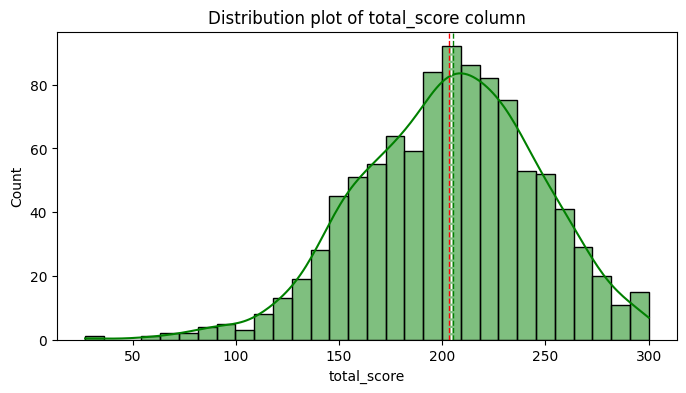

Kurtosis value : 0.12584287362370716
Skeweness value: -0.2990571175016888


In [13]:
plt.figure(figsize=(8, 4))
plt.title('Distribution plot of total_score column')
sns.histplot(data=data, x='total_score', bins=30, kde=True, color='g')
plt.axvline(data['total_score'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(data['total_score'].median(), color='g', linestyle='dashed', linewidth=1)
plt.axvline(data['total_score'].mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()
print(f"Kurtosis value : {data['total_score'].kurtosis()}")
print(f"Skeweness value: {data['total_score'].skew()}")

 #### Insight: 

 Here the histogram shows how frequently every value in a dataset occurs in a relatively unbiased way. Here the mean, meadian and mode of total_score column is approximately 205. It is a unimodal normal distribution.


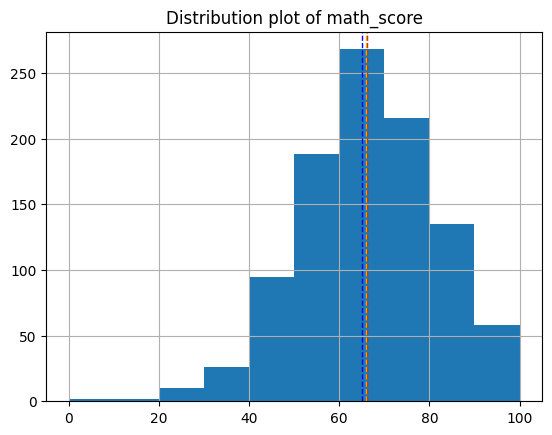

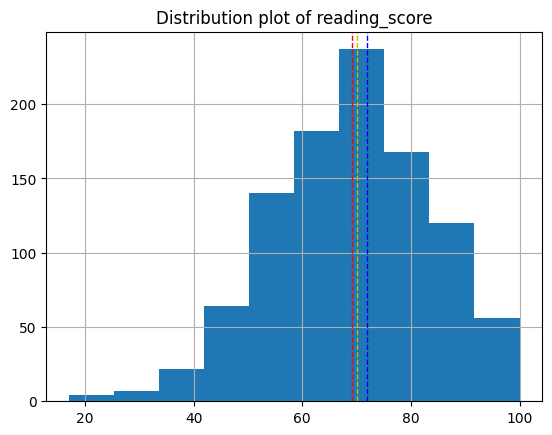

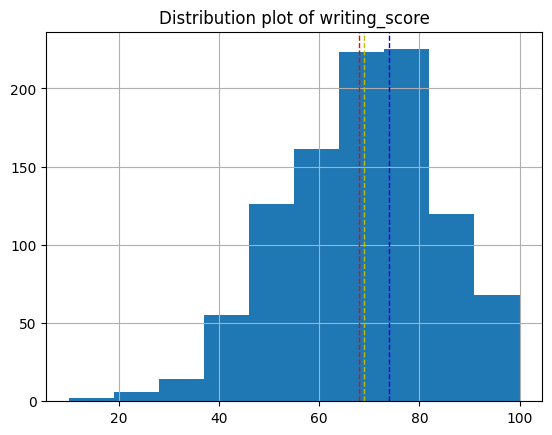

In [14]:
for i in num_cols:
    plt.figure()
    data[i].hist()
    plt.title(f"Distribution plot of {i}")
    plt.axvline(data[i].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(data[i].median(), color='y', linestyle='dashed', linewidth=1)
    plt.axvline(data[i].mode()[0], color='b', linestyle='dashed', linewidth=1)
    plt.show()

#### Insight: 
The distribution of reading sccore and writing score looks like bell curve, with slightly left skewed. Here many of the values are near the higher end of the range, and lower values are infrequent. i.e., Reading and writing score of many students are high, and very few have low scores.  Here Mean(Red line) < Median(Yellow line) < Mode(Blue line). The mean value is lesser because the mean is more sensitive to those lower values and is drawn towards the tail of the histogram.

Math score is approximately normaly distributed.

In [56]:
print("No.of students under various conditions")
print("-----"*8)
print(f"\nReading score < 20 : {data[data['reading_score']<=20]['reading_score'].count()}")
print(f"Writing score < 20 : {data[data['writing_score']<=20]['writing_score'].count()}")
print(f"Math score < 20    : {data[data['math_score']<=20]['math_score'].count()}")

print(f"\nFull marks in Reading score : {data[data['reading_score']==100]['reading_score'].count()}")
print(f"Full marks in Writing score : {data[data['writing_score']==100]['writing_score'].count()}")
print(f"Full marks in Math score    : {data[data['math_score']==100]['math_score'].count()}")

No.of students under various conditions
----------------------------------------

Reading score < 20 : 1
Writing score < 20 : 3
Math score < 20    : 4

Full marks in Reading score : 17
Full marks in Writing score : 14
Full marks in Math score    : 7


#### Insight:
Overall, students performed well in reading and bad in math

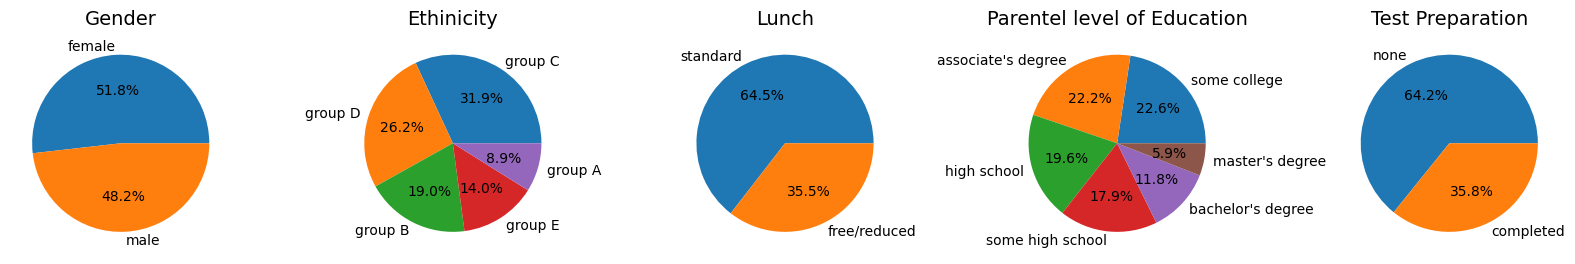

In [15]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)

plt.subplot(1,5,1)
plt.title('Gender',fontsize = 14)
plt.pie(data['gender'].value_counts(), labels = data['gender'].value_counts().index, autopct = '%.1f%%')


plt.subplot(1,5,2)
plt.title('Ethinicity',fontsize = 14)
plt.pie(data['race_ethnicity'].value_counts(), labels = data['race_ethnicity'].value_counts().index, autopct = '%.1f%%')


plt.subplot(1,5,3)
plt.title('Lunch',fontsize = 14)
plt.pie(data['lunch'].value_counts(), labels = data['lunch'].value_counts().index, autopct = '%.1f%%')


plt.subplot(1,5,4)
plt.title('Parentel level of Education',fontsize = 14)
plt.pie(data['parental_level_of_education'].value_counts(), labels = data['parental_level_of_education'].value_counts().index, autopct = '%.1f%%')

plt.subplot(1,5,5)
plt.title('Test Preparation',fontsize = 14)
plt.pie(data['test_preparation_course'].value_counts(), labels = data['test_preparation_course'].value_counts().index, autopct = '%.1f%%')
plt.show()



#### Insight: 

The above plots show the distribution of values in the categorical columns of the dataset.
* The data has almost same percent of female and male students
* Race ethnicity columns have 5 groups with observation in group C > group D > group B > group E > group A
* Most of the student's parents have either some college / high school / associate degree. Very few student's parents have masters degree
* 64.5% of students had their lunch before the test
* 64.2% of students didn't take any test preparation course

### 4.2 Bivariate Analysis

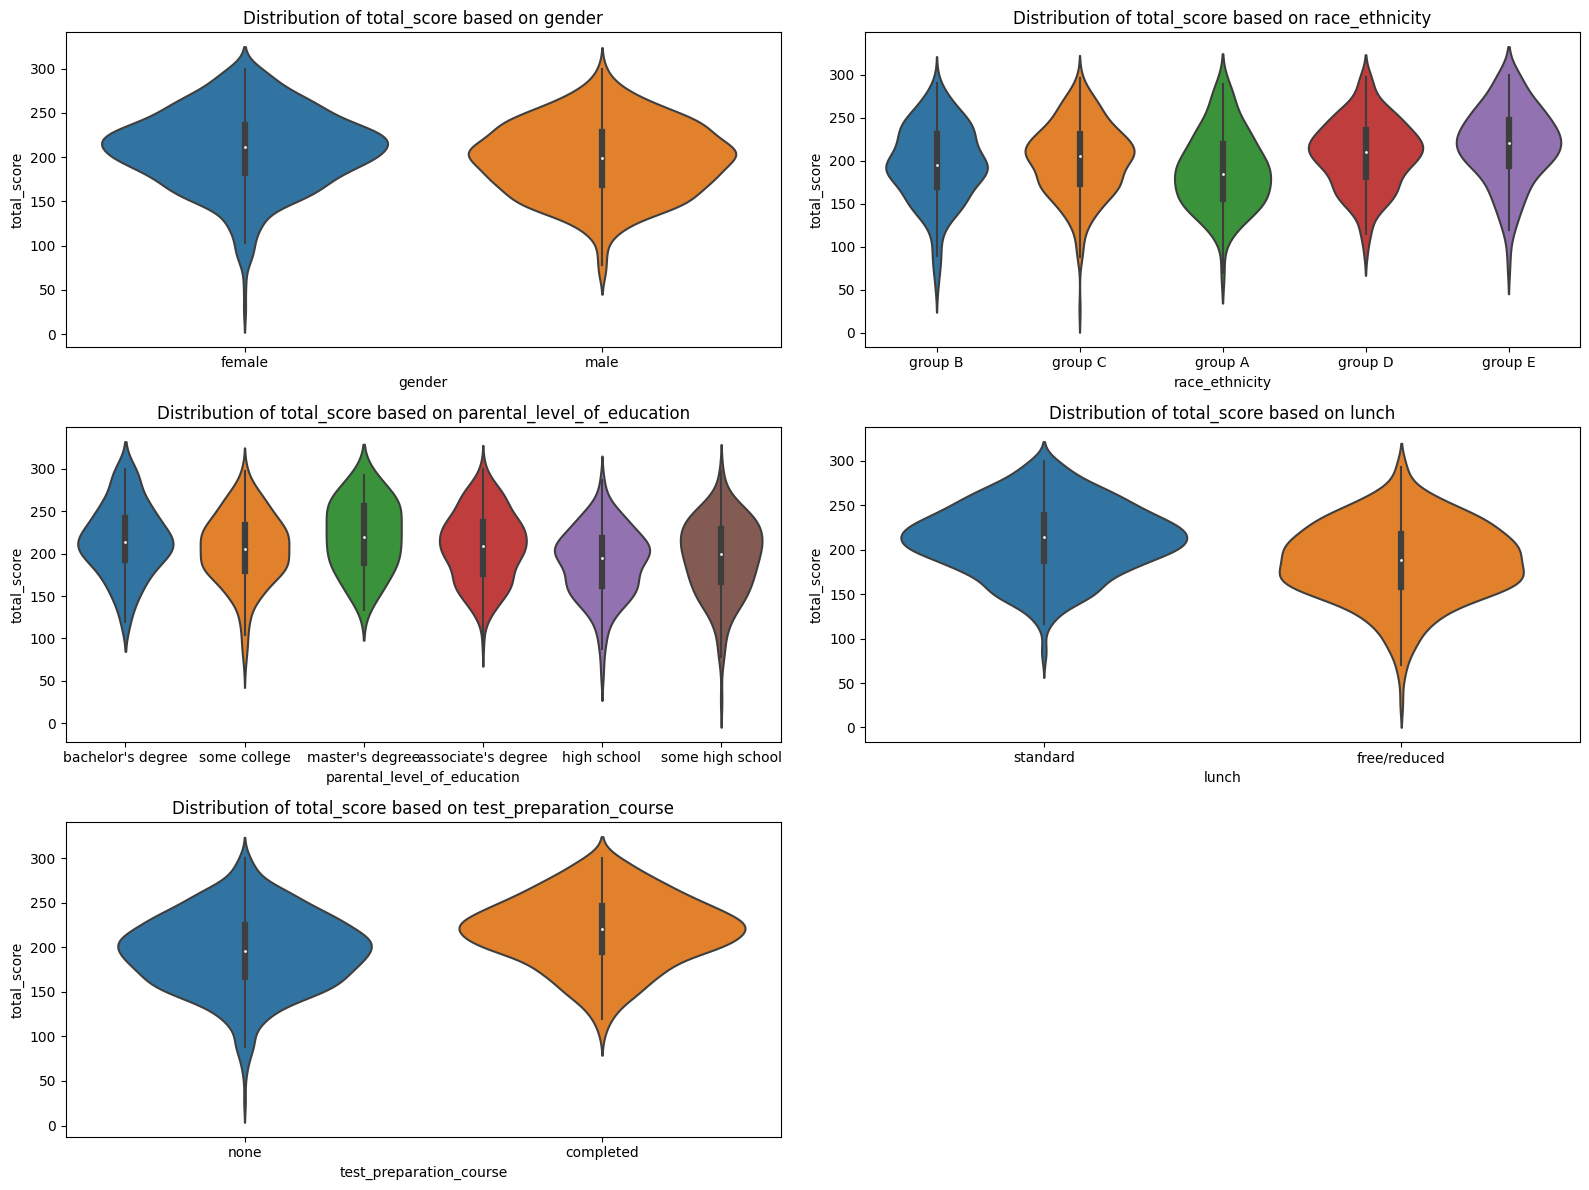

In [16]:
plt.figure(figsize=(16,12))

plt.subplot(3,2,1)
sns.violinplot(x= data['gender'], y=data['total_score'])
plt.title('Distribution of total_score based on gender')

plt.subplot(3,2,2)
sns.violinplot(x= data['race_ethnicity'], y=data['total_score'])
plt.title('Distribution of total_score based on race_ethnicity')

plt.subplot(3,2,3)
sns.violinplot(x= data['parental_level_of_education'], y=data['total_score'])
plt.title('Distribution of total_score based on parental_level_of_education')

plt.subplot(3,2,4)
sns.violinplot(x= data['lunch'], y=data['total_score'])
plt.title('Distribution of total_score based on lunch')

plt.subplot(3,2,5)
sns.violinplot(x= data['test_preparation_course'], y=data['total_score'])
plt.title('Distribution of total_score based on test_preparation_course')

plt.tight_layout()

#### Insights:
* Females have more total score than males
* Group E have most median score and group A have the least median score
* Median score of students has no effect on parental level of education. However, minimum total score of students with parental education as masters have a higher value compared to others.
* Students with standard lunch performed better in test compared those taking free/reduced lunch
* There is big difference in the median score of students based on test preparation course. However, students who took a test preparation score have higher minimum score compared to those who didn't take any preparation course.

How a score depends on each gender category?
------------------------------------------


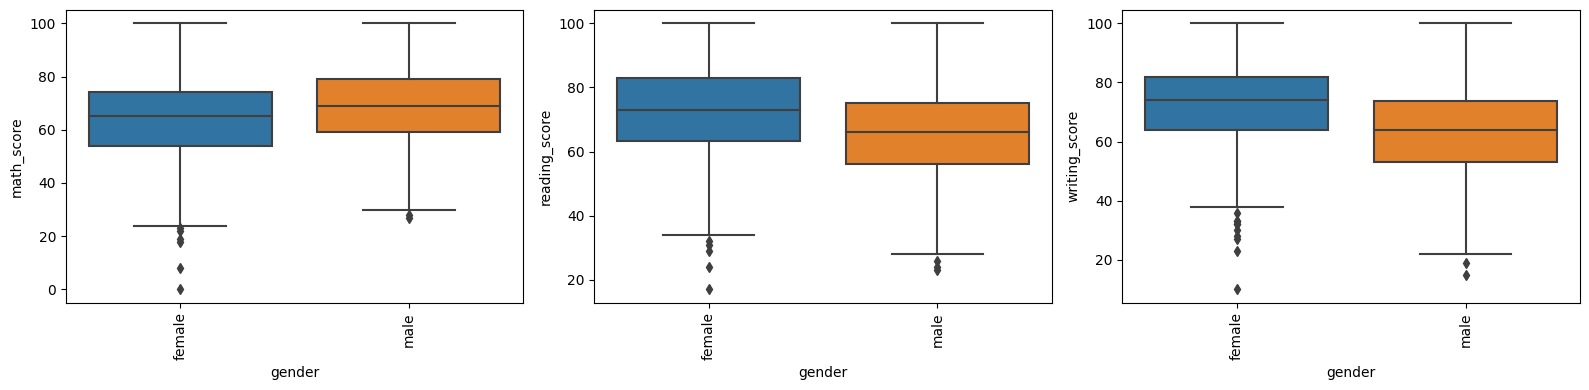



How a score depends on each race_ethnicity category?
--------------------------------------------------


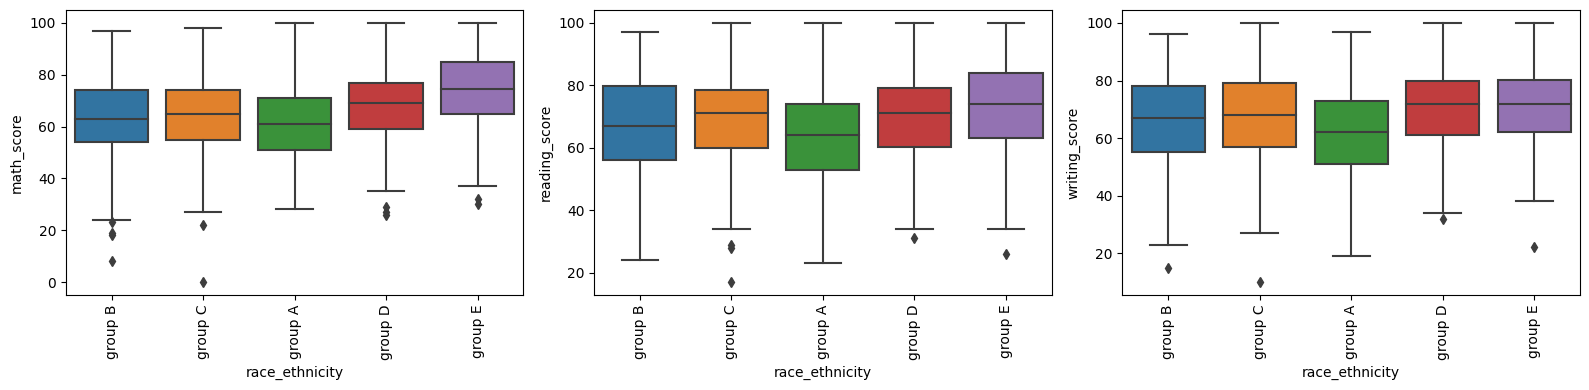



How a score depends on each parental_level_of_education category?
---------------------------------------------------------------


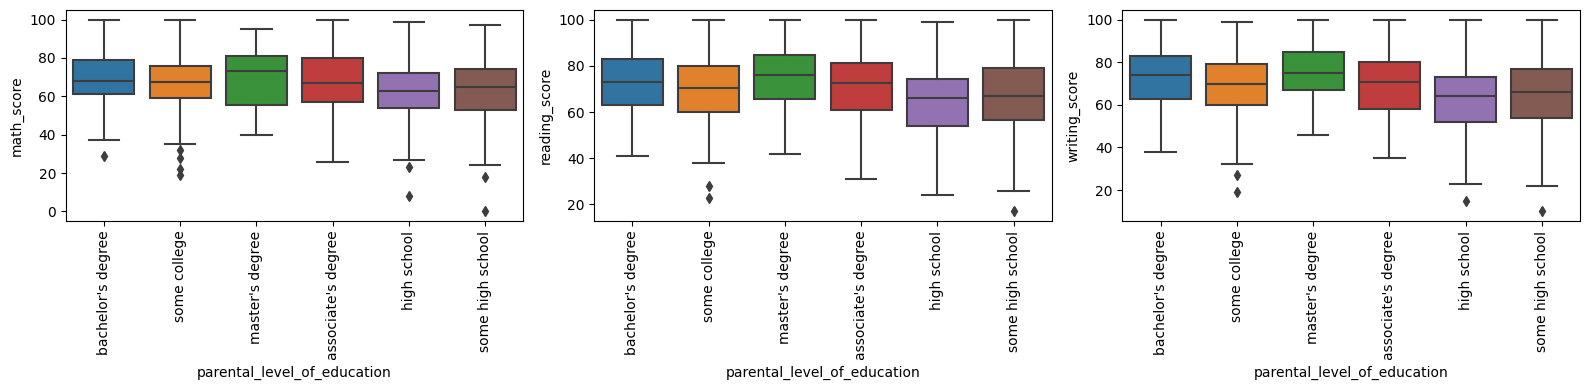



How a score depends on each lunch category?
-----------------------------------------


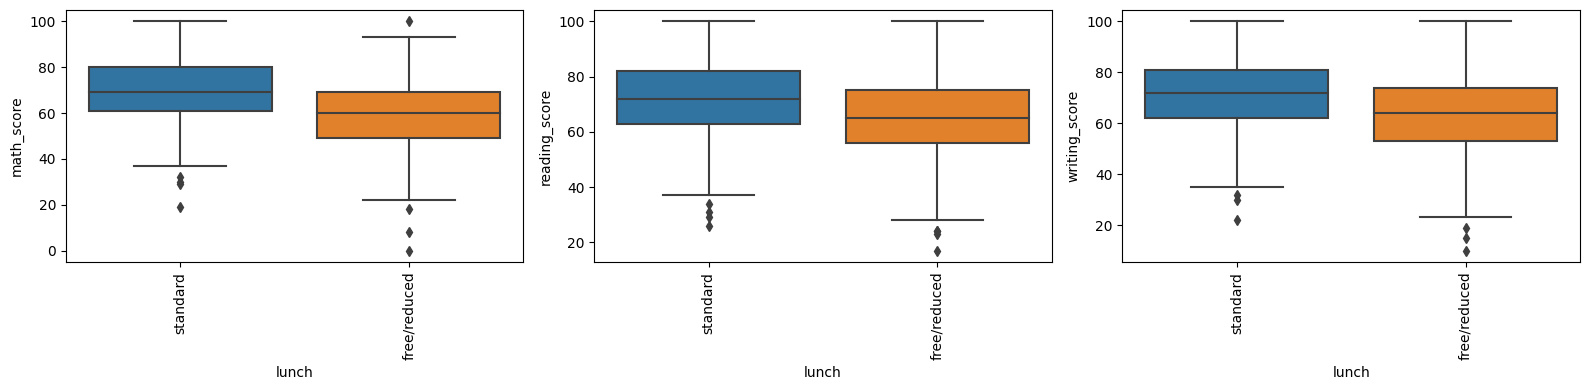



How a score depends on each test_preparation_course category?
-----------------------------------------------------------


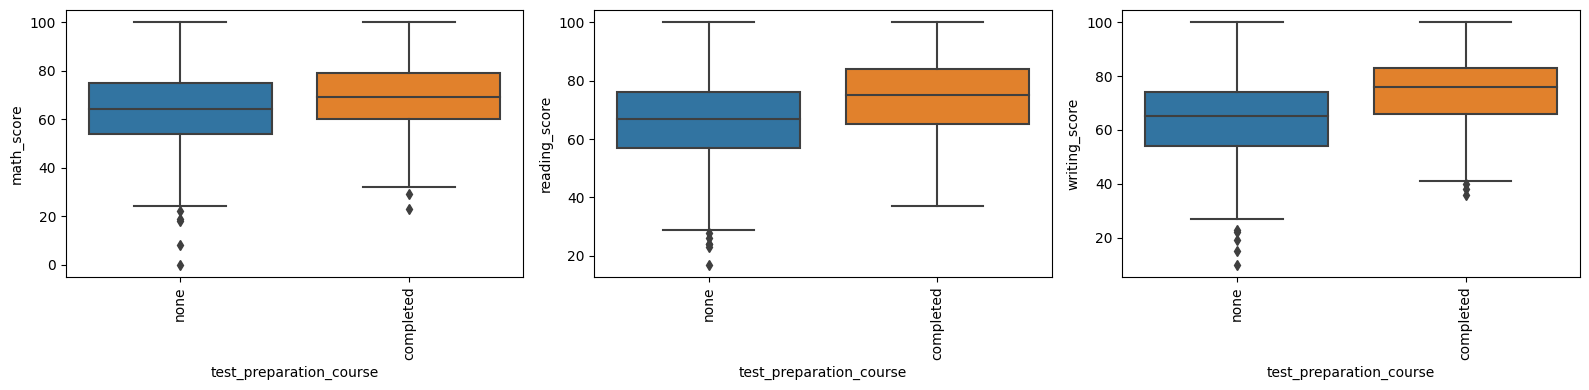

In [17]:
for i in obj_cols:
    plt.figure(figsize=(16,4))
    print(f'\033[1mHow a score depends on each {i} category?\033[1m')
    print('-' * (36+len(i)), sep='')
    plt.subplot(1,3,1)
    sns.boxplot(x=data[i], y=data['math_score'])
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,2)    
    sns.boxplot(x=data[i], y=data['reading_score'])
    plt.xticks(rotation=90)

    plt.subplot(1,3,3)
    sns.boxplot(x=data[i], y=data['writing_score'])    
    plt.xticks(rotation=90)
    
    plt.tight_layout()
    plt.show()
    print("\n")


#### Insights:
* Males have higher math score while females have higher reading and writing score.
* Group E have higher math and reading score while all the groups except group A performed similar in the writing.
* Students with parental level of education as masters degree performed well in all 3 tests
* Students with standard lunch and test preparation course performed better in all 3 tests.

### 4.3 Multivariate Analysis

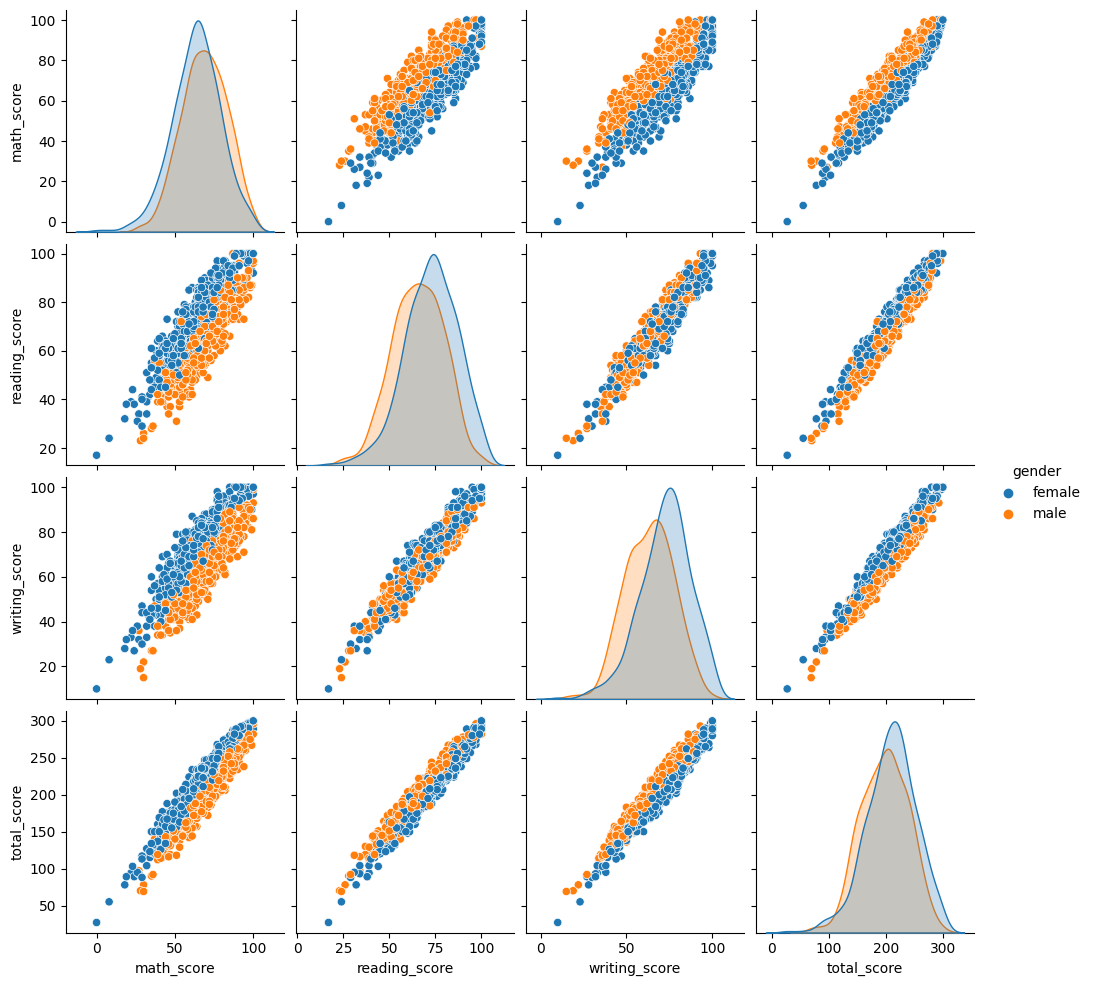

In [18]:
sns.pairplot(data, hue = 'gender')

#### Insights:

There is a high positive correlation between the scores. An increase in one score indicates increase in the other score.

#### Conclusion : 
* Female students scored more in reading and writing while male students scored more in maths. Overall total score of female students is higher than male students
* Students who completed a test preparation course have a higher minimum score as it can be due to the fact that the preparation course helps to improve the performance of students.
* Students with standard lunch have high scores than students who had free/reduced lunch.
* Student's with parental level of education as masters degree performed well in the test as the minimum mark of those are highest
* There is a high positive correlation between 3 test scores, indicating that a students with high mark in one test also have high score in other test and viceversa
